# Composition MDP

In [1]:
from examples.notebooks.utils import render_target, render_service, render_composition_mdp
from stochastic_service_composition.composition import composition_mdp
from stochastic_service_composition.services import Service, build_system_service, build_service_from_transitions
from stochastic_service_composition.target import build_target_from_transitions, Target


## Target


def build_target_service() -> Target:
    """Build the target service."""
    transition_function = {
        "t0": {
            "hot_air_on": ("t1", 0.6, 5),
            "move_to_kitchen": ("t8", 0.2, 3),
            "open_door_kitchen": ("t7", 0.2, 2),
        },
        "t1": {"fill_up_bathtub": ("t2", 0.7, 4), "hot_air_on": ("t1", 0.3, 2)},
        "t2": {
            "move_to_bathroom": ("t3", 0.5, 3),
            "open_door_bathroom": ("t2", 0.5, 2),
        },
        "t3": {"move_to_bathroom": ("t3", 0.2, 4), "wash": ("t4", 0.8, 8)},
        "t4": {"move_to_bedroom": ("t5", 1.0, 10)},
        "t5": {"empty_bathtub": ("t6", 0.9, 7), "move_to_bedroom": ("t5", 0.1, 3)},
        "t6": {"air_off": ("t7", 1.0, 10)},
        "t7": {"move_to_kitchen": ("t8", 0.5, 5), "open_door_kitchen": ("t7", 0.5, 4)},
        "t8": {
            "cook_eggs": ("t9", 0.6, 7),
            "move_to_kitchen": ("t8", 0.2, 5),
            "prepare_tea": ("t0", 0.2, 2),
        },
        "t9": {"no_op": ("t0", 0.8, 1), "vent_kitchen": ("t9", 0.2, 1)},
    }

    initial_state = "t0"
    final_states = {"t0"}

    return build_target_from_transitions(
        transition_function, initial_state, final_states
    )

target_service = build_target_service()

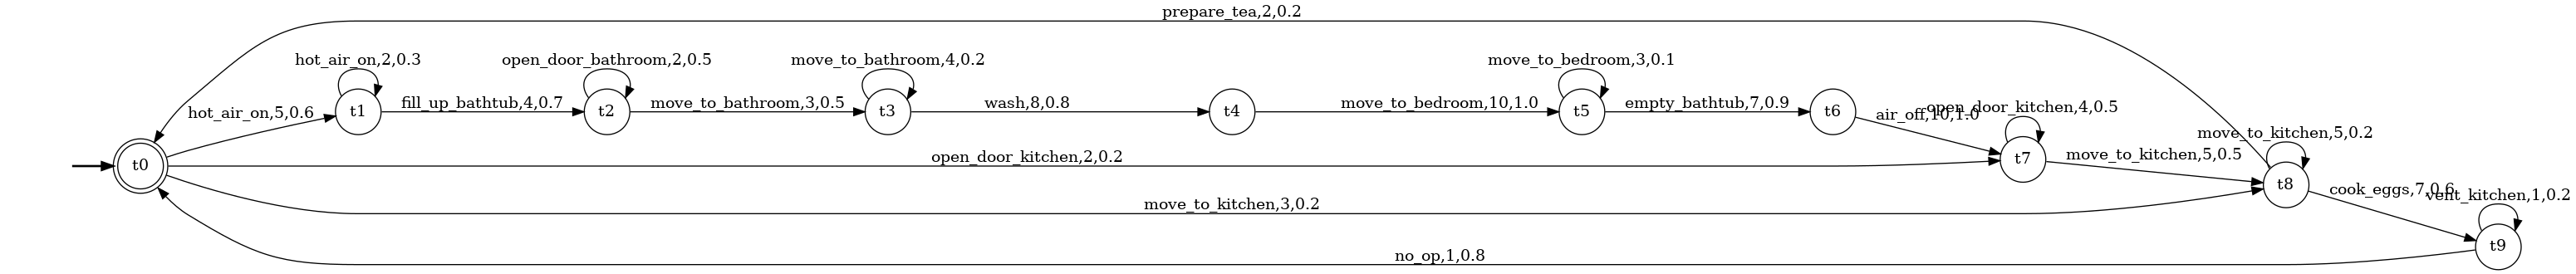

In [2]:
render_target(target_service)

## Service community

In [3]:
def bathroom_heating_device() -> Service:
    """Build the bathroom heating device."""
    transitions = {
        "air_cold": {
            "cold_air_on": "air_cold",
            "air_off": "air_off",
        },
        "air_off": {
            "cold_air_on": "air_cold",
            "hot_air_on": "air_hot",
        },
        "air_hot": {"hot_air_on": "air_hot", "air_off": "air_off"},
    }
    final_states = {"air_off"}
    initial_state = "air_off"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


def bathtub_device() -> Service:
    """Build the bathtub device."""
    transitions = {
        "empty": {
            "fill_up_bathtub": "filled",
        },
        "filled": {"empty_bathtub": "empty"},
    }
    final_states = {"empty"}
    initial_state = "empty"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


def kitchen_door_device() -> Service:
    """Build the kitchen door device."""
    transitions = {
        "unique": {
            "open_door_kitchen": "unique",
            "close_door_kitchen": "unique",
        },
    }
    final_states = {"unique"}
    initial_state = "unique"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


def bathroom_door_device() -> Service:
    """Build the bathroom door device."""
    transitions = {
        "unique": {
            "open_door_bathroom": "unique",
            "close_door_bathroom": "unique",
        },
    }
    final_states = {"unique"}
    initial_state = "unique"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


def kitchen_exhaust_fan_device() -> Service:
    """Build the kitchen exhaust fan device."""
    transitions = {
        "unique": {
            "vent_kitchen": "unique",
        },
    }
    final_states = {"unique"}
    initial_state = "unique"
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


def user_behaviour() -> Service:
    """It is the user behaviour service."""
    transitions = {
        "s0": {
            "move_to_bedroom": "s0",
            "move_to_bathroom": "s1",
            "move_to_kitchen": "s3",
        },
        "s1": {
            "move_to_bathroom": "s1",
            "wash": "s2",
        },
        "s2": {
            "move_to_bedroom": "s0",
        },
        "s3": {
            "move_to_kitchen": "s3",
            "cook_eggs": "s0",
            "prepare_tea": "s0",
        },
    }
    initial_state = "s0"
    final_states = {"s0"}
    return build_service_from_transitions(transitions, initial_state, final_states)  # type: ignore


bathroom_heating_service = bathroom_heating_device()
bathtub_service = bathtub_device()
kitchen_door_service = kitchen_door_device()
bathroom_door_service = kitchen_door_device()
kitchen_exhaust_fan_service = kitchen_exhaust_fan_device()
user_behaviour = user_behaviour()

all_services = [
    bathroom_heating_service,
    bathtub_service,
    kitchen_door_service,
    bathroom_door_service,
    kitchen_exhaust_fan_service,
    user_behaviour
]
system_service = build_system_service(*all_services)


render_service(system_service)

## Compute the composition MDP

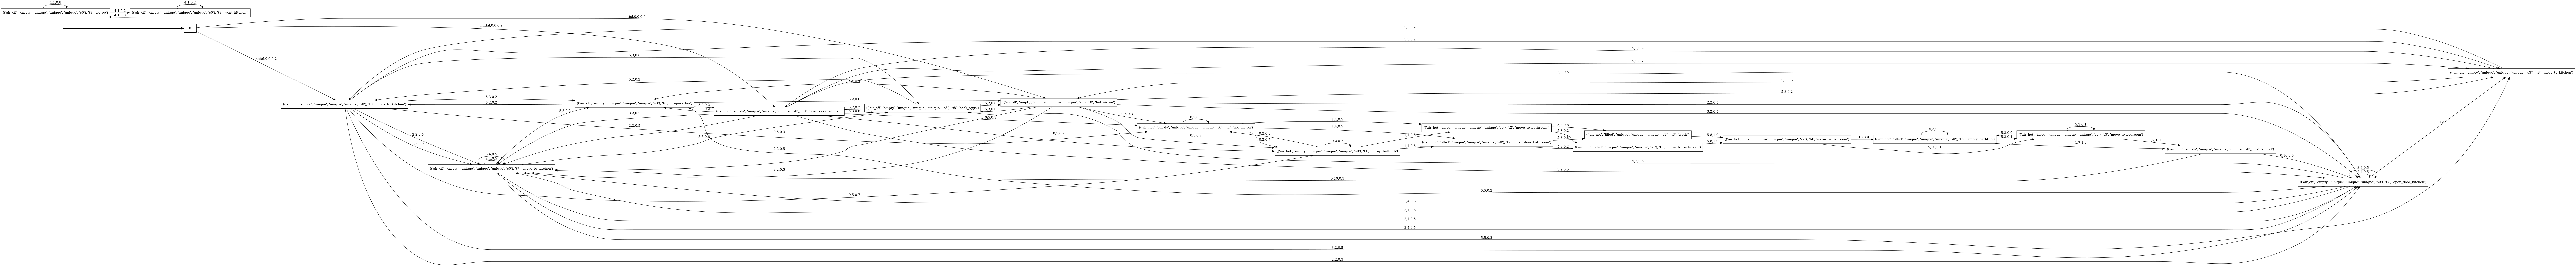

In [4]:
mdp = composition_mdp(target_service, *all_services)

render_composition_mdp(mdp)

In [5]:
print(f"Number of states: {len(mdp.all_states)}")

Number of states: 21


In [6]:
for state, transitions in mdp.transitions.items():
    for action, next_states in transitions.items():
        for next_state, prob in next_states.items():
            print(state, action, next_state, prob)

0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0.6
0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'move_to_kitchen') 0.2
0 initial (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'open_door_kitchen') 0.2
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0 (('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'fill_up_bathtub') 0.7
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 0 (('air_hot', 'empty', 'unique', 'unique', 'unique', 's0'), 't1', 'hot_air_on') 0.3
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 2 (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't7', 'move_to_kitchen') 0.5
(('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't0', 'hot_air_on') 2 (('air_off', 'empty', 'unique', 'unique', 'unique', 's0'), 't7', 'open_door_kitchen') 0.5
(('air_off', 'empty', 'unique', 'uni